In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import html
import unicodedata
import math
from collections import Counter
import itertools
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer, mean_squared_error, r2_score, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import cross_val_score, KFold



In [3]:
#Project Data from Kaggle

import kagglehub
import os
path = kagglehub.dataset_download("canerkonuk/youtube-trending-videos-global")
print("Path to dataset files:", path)
df = pd.read_csv(os.path.join(path, 'youtube_trending_videos_global.csv'))

Using Colab cache for faster access to the 'youtube-trending-videos-global' dataset.
Path to dataset files: /kaggle/input/youtube-trending-videos-global


/tmp/ipython-input-3789840393.py:7: DtypeWarning: Columns (13,14,15,24) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(path, 'youtube_trending_videos_global.csv'))


In [4]:
df.head()

video_id    video_published_at video_trending__date  \
0  bB3-CUMERIU  2024-10-11T00:00:06Z           2024.10.12   
1  5ObJt_71AYc  2024-10-11T02:59:21Z           2024.10.12   
2  zfb0whgBBA8  2024-10-11T11:07:25Z           2024.10.12   
3  SJfoPdeOPCQ  2024-10-11T00:10:10Z           2024.10.12   
4  UVb6QOKy0bI  2024-10-09T12:30:27Z           2024.10.12   

  video_trending_country                channel_id  \
0   United Arab Emirates  UCNYi_zGmR519r5gYdOKLTjQ   
1   United Arab Emirates  UCzU8-lZlRfkV3nj0RzAZdrQ   
2   United Arab Emirates  UCgGYPnVJytkr6sVNLQ-l0zQ   
3   United Arab Emirates  UCzU8-lZlRfkV3nj0RzAZdrQ   
4   United Arab Emirates  UCOzubmwpVZI7gD0Jf7Bk3Aw   

                                         video_title  \
0             JENNIE - Mantra (Official Music Video)   
1  CHILE vs. BRASIL [1-2] | RESUMEN | ELIMINATORI...   
2            تحدي الحقيبة مع ابو عبير 🔥 | سلسلتنا #2   
3  VENEZUELA vs. ARGENTINA [1-1] | RESUMEN | ELIM...   
4  Bougainvillea Trailer | October 17 | Jyothirma...   

                                   video_description  \
0  Official music video for “Mantra” by JENNIE ou...   
1  #Chile #Brasil #eliminatoriassudamericanas #Cr...   
2  1,375,547 مشترك❤️\n\nـــــــــــــــــــــــــ...   
3  #Venezuela #Argentina #eliminatoriassudamerica...   
4  Presenting The Official Trailer of Bougainvill...   

                          video_default_thumbnail video_category_id  \
0  https://i.ytimg.com/vi/bB3-CUMERIU/default.jpg             Music   
1  https://i.ytimg.com/vi/5ObJt_71AYc/default.jpg            Sports   
2  https://i.ytimg.com/vi/zfb0whgBBA8/default.jpg            Gaming   
3  https://i.ytimg.com/vi/SJfoPdeOPCQ/default.jpg            Sports   
4  https://i.ytimg.com/vi/UVb6QOKy0bI/default.jpg  Film & Animation   

                                          video_tags  ...  \
0  JENNIE,Mantra,제니,Jennie Mantra,Jennie from Bla...  ...   
1  fútbol,pelota,gol,copa,libertadores,sudamerica...  ...   
2  تشكيله,فيفا,فيفا20,التمت,درافت,زلاتان,ام,جي,مل...  ...   
3  fútbol,pelota,gol,copa,libertadores,sudamerica...  ...   
4                                                NaN  ...   

                                 channel_description  \
0                                                NaN   
1  Canal Oficial de la Confederación Sudamericana...   
2             صانع محتوى وانزل مقاطع بشكل غير منظم 🌚   
3  Canal Oficial de la Confederación Sudamericana...   
4  Official YouTube Channel Of Amal Neerad Produc...   

           channel_custom_url        channel_published_at channel_country  \
0             @jennierubyjane  2021-01-13T06:19:55.86689Z             NaN   
1                   @conmebol        2014-02-19T20:24:31Z             NaN   
2                    @mrlle99        2012-08-01T16:24:26Z    Saudi Arabia   
3                   @conmebol        2014-02-19T20:24:31Z             NaN   
4  @amalneeradproductions5264        2017-05-31T14:31:01Z             NaN   

  channel_view_count channel_subscriber_count  \
0        464615150.0               11600000.0   
1        399046746.0                1610000.0   
2        114331110.0                1380000.0   
3        399046746.0                1610000.0   
4         19991522.0                  40600.0   

   channel_have_hidden_subscribers channel_video_count  \
0                            False                43.0   
1                            False              4637.0   
2                            False               314.0   
3                            False              4637.0   
4                            False                56.0   

   channel_localized_title                      channel_localized_description  
0                   JENNIE                                                NaN  
1                 CONMEBOL  Canal Oficial de la Confederación Sudamericana...  
2             LLE عبدالاله             صانع محتوى وانزل مقاطع بشكل غير منظم 🌚  
3                 CONMEBOL  Canal Oficial de la Confederación Sudamericana...  
4 

In [5]:
df.shape

(5156094, 28)

In [6]:
df.columns

Index(['video_id', 'video_published_at', 'video_trending__date',
       'video_trending_country', 'channel_id', 'video_title',
       'video_description', 'video_default_thumbnail', 'video_category_id',
       'video_tags', 'video_duration', 'video_dimension', 'video_definition',
       'video_licensed_content', 'video_view_count', 'video_like_count',
       'video_comment_count', 'channel_title', 'channel_description',
       'channel_custom_url', 'channel_published_at', 'channel_country',
       'channel_view_count', 'channel_subscriber_count',
       'channel_have_hidden_subscribers', 'channel_video_count',
       'channel_localized_title', 'channel_localized_description'],
      dtype='object')

In [7]:
#First glance at data

df.info()

df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5156094 entries, 0 to 5156093
Data columns (total 28 columns):
 #   Column                           Dtype  
---  ------                           -----  
 0   video_id                         object 
 1   video_published_at               object 
 2   video_trending__date             object 
 3   video_trending_country           object 
 4   channel_id                       object 
 5   video_title                      object 
 6   video_description                object 
 7   video_default_thumbnail          object 
 8   video_category_id                object 
 9   video_tags                       object 
 10  video_duration                   object 
 11  video_dimension                  object 
 12  video_definition                 object 
 13  video_licensed_content           object 
 14  video_view_count                 object 
 15  video_like_count                 object 
 16  video_comment_count              float64
 17  channel_

video_comment_count  channel_view_count  channel_subscriber_count  \
count         5.124550e+06        5.147487e+06              5.155795e+06   
mean          6.480116e+03        4.860728e+09              1.162331e+07   
std           2.426103e+04        1.257990e+10              3.725749e+07   
min           0.000000e+00        0.000000e+00              0.000000e+00   
25%           3.540000e+02        1.670908e+08              5.130000e+05   
50%           1.310000e+03        8.428570e+08              2.360000e+06   
75%           3.969000e+03        3.989191e+09              9.510000e+06   
max           6.009910e+05        3.126571e+11              4.150000e+08   

       channel_video_count  
count         5.155795e+06  
mean          4.773472e+03  
std           2.221759e+04  
min           0.000000e+00  
25%           2.180000e+02  
50%           6.900000e+02  
75%           1.768000e+03  
max           6.204610e+05

In [8]:
df['video_category_id'].unique()

array(['Music', 'Sports', 'Gaming', 'Film & Animation', 'People & Blogs',
       'Entertainment', 'News & Politics', 'Comedy', 'Howto & Style',
       'Education', 'Travel & Events', 'Pets & Animals',
       'Science & Technology', nan, 'Autos & Vehicles', 'Better Voice',
       'Nonprofits & Activism', 'CHK CHK (촉촉)', 'False'], dtype=object)



### Pre-Process Data

In [9]:
#Import modules needed to preprocess data

import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('wordnet')
nltk.download('punkt_tab')

from sklearn.preprocessing import LabelEncoder
from datasets import Dataset
from transformers import AutoTokenizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [10]:
#Determine which countries are included

df['video_trending_country'].unique()

array(['United Arab Emirates', 'Bahrain', 'Algeria', 'Egypt', 'Iraq',
       'Jordan', 'Kuwait', 'Lebanon', 'Libya', 'Morocco', 'Oman', 'Qatar',
       'Saudi Arabia', 'Tunisia', 'Yemen', 'Azerbaijan', 'Belarus',
       'Bulgaria', 'Bangladesh', 'Bosnia and Herzegovina', 'Czechia',
       'Denmark', 'Austria', 'Switzerland', 'Germany', 'Greece',
       'Australia', 'Belgium', 'Canada', 'United Kingdom', 'Ghana',
       'Ireland', 'Israel', 'India', 'Jamaica', 'Kenya', 'Malta',
       'Nigeria', 'New Zealand', 'Singapore', 'Uganda', 'United States',
       'South Africa', 'Zimbabwe', 'Argentina', 'Bolivia', 'Chile',
       'Colombia', 'Costa Rica', 'Dominican Republic', 'Ecuador', 'Spain',
       'Guatemala', 'Honduras', 'Mexico', 'Nicaragua', 'Panama', 'Peru',
       'Puerto Rico', 'Paraguay', 'El Salvador', 'Uruguay', 'Venezuela',
       'Estonia', 'Finland', 'Philippines', 'France', 'Senegal',
       'Croatia', 'Hungary', 'Indonesia', 'Iceland', 'Italy', 'Japan',
       'Georgia', 'K

In [11]:
#Filter dataset by U.S. and Canada countries with English content

df = df[df['channel_country'].isin(['United States', 'Canada'])]
df = df[df['video_trending_country'].isin(['United States', 'Canada'])]

df.head()

video_id    video_published_at video_trending__date  \
3929  g909vB-BSXo  2024-10-11T14:29:42Z           2024.10.12   
3931  Mu-eK72ioDk  2024-10-11T03:39:55Z           2024.10.12   
3932  7_bIoo3I5q4  2024-10-11T21:02:00Z           2024.10.12   
3933  hMDVJNSWWiU  2024-10-11T16:00:06Z           2024.10.12   
3934  kpOu1jmDEbQ  2024-10-12T11:25:27Z           2024.10.12   

     video_trending_country                channel_id  \
3929                 Canada  UClG8odDC8TS6Zpqk9CGVQiQ   
3931                 Canada  UCOmcA3f_RrH6b9NmcNa4tdg   
3932                 Canada  UCQIUhhcmXsu6cN6n3y9-Pww   
3933                 Canada  UC2hm5rD_IrfYRMfq5YQudgA   
3934                 Canada  UCqVCSWnuOSPm26orvNDTuWQ   

                                            video_title  \
3929                Fortnitemares 2024 Gameplay Trailer   
3931  Tesla's 'We, Robot' Event: Everything Revealed...   
3932        I Made My Own AAU Team and This Happened...   
3933                                 My Mario Childhood   
3934                     FORTNITEMARES Is FINALLY Here!   

                                      video_description  \
3929  Do you want to play a game… of Fortnite?\n\nGe...   
3931  At Tesla's 'We, Robot' event in Los Angeles, C...   
3932  The Tournament Kit: https://go.bucketsquad.com...   
3933  The way I act while playing Mario party is not...   
3934  Fortnite Fortnitemares Update Chapter 5, Seaso...   

                             video_default_thumbnail     video_category_id  \
3929  https://i.ytimg.com/vi/g909vB-BSXo/default.jpg                Gaming   
3931  https://i.ytimg.com/vi/Mu-eK72ioDk/default.jpg  Science & Technology   
3932  https://i.ytimg.com/vi/7_bIoo3I5q4/default.jpg                Sports   
3933  https://i.ytimg.com/vi/hMDVJNSWWiU/default.jpg                Comedy   
3934  https://i.ytimg.com/vi/kpOu1jmDEbQ/default.jpg                Gaming   

                                             video_tags  ...  \
3929  yt:cc=on,fortnite,fortnitemares,halloween,october  ...   
3931  CNET,Technology,tech,tesla,elon,elon musk,robo...  ...   
3932  jesser,basketball,aau,aau tournament,aau tourn...  ...   
3933                                        Haminations  ...   
3934                                                NaN  ...   

                                    channel_description channel_custom_url  \
3929  A free multiplayer game where you compete in B...          @fortnite   
3931  CNET is the premier destination for explaining...              @cnet   
3932  Subscribe?\n\n★FOLLOW ME ON SOCIAL MEDIA★\n●Tw...            @jesser   
3933  23 year old college drop out who tells silly l...       @haminations   
3934  Hey! My name is TG aka Typical Gamer and I'm a...           @tgplays   

             channel_published_at channel_country channel_view_count  \
3929         2014-01-17T12:44:00Z   United States       2.853770e+09   
3931         2006-05-05T19:10:07Z   United States       1.833767e+09   
3932         2012-07-09T14:47:06Z   United States       5.535080e+09   
3933         2017-02-20T15:20:17Z   United States       1.523182e+09   
3934  2020-03-02T21:57:14.972922Z   United States       2.951301e+09   

     channel_subscriber_count  channel_have_hidden_subscribers  \
3929               12700000.0                            False   
3931                3870000.0                            False   
3932               21000000.0                            False   
3933                6880000.0                            False   
3934                8120000.0                            False   

     channel_video_count channel_localized_title  \
3929              1397.0                Fortnite   
3931             22787.0                    CNET   
3932              1413.0                  Jesser   
3933                86.0             Haminations   
3934              1353.0                TG Plays   

                          channel_localized_description  
3929  A free multiplayer game where you compete

In [12]:
#Count of filtered data
df.shape

(79437, 28)

In [13]:
df.isna().sum()

video_id                               0
video_published_at                     0
video_trending__date                   0
video_trending_country                 0
channel_id                             0
video_title                            0
video_description                    514
video_default_thumbnail                0
video_category_id                     17
video_tags                         15644
video_duration                         0
video_dimension                        0
video_definition                       0
video_licensed_content                 0
video_view_count                       0
video_like_count                     249
video_comment_count                  922
channel_title                          0
channel_description                 3649
channel_custom_url                     0
channel_published_at                   0
channel_country                        0
channel_view_count                   126
channel_subscriber_count               0
channel_have_hidden_subscribers        0
channel_video_count                    0
channel_localized_title                0
channel_localized_description       3649
dtype: int64

In [14]:
#Replace missing values with a filler word
#df[['description', 'hashtags']] = df[['description', 'hashtags']].fillna('empty', inplace = True)
#df.isna().sum()

#Drop missing values for rows with pertinent data for visualization and insight
df.dropna(subset = ['video_tags','video_like_count', 'video_comment_count', 'channel_view_count'], inplace = True)
df.isna().sum()

video_id                              0
video_published_at                    0
video_trending__date                  0
video_trending_country                0
channel_id                            0
video_title                           0
video_description                    91
video_default_thumbnail               0
video_category_id                     0
video_tags                            0
video_duration                        0
video_dimension                       0
video_definition                      0
video_licensed_content                0
video_view_count                      0
video_like_count                      0
video_comment_count                   0
channel_title                         0
channel_description                2215
channel_custom_url                    0
channel_published_at                  0
channel_country                       0
channel_view_count                    0
channel_subscriber_count              0
channel_have_hidden_subscribers       0
channel_video_count                   0
channel_localized_title               0
channel_localized_description      2215
dtype: int64

In [15]:
#Remove stopwords from preprocessed text. Lemmatization is applied to reduce words to their base or root form.
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()


In [16]:
#Preprocess data

def preprocess_text(text):
    # Check if the input is a string, if not, return an empty string
    if not isinstance(text, str):
        return ""

    # Convert to lowercase
    text = text.lower()

    # Remove special characters and digits
    text = re.sub(r'[^a-zA-Z\s]', r' ', text)

    #Tokenize the text
    tokens = nltk.word_tokenize(text)
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]

    return ' '.join(tokens)

df['clean_video_title'] = df['video_title'].apply(preprocess_text)
df['clean_channel_title'] = df['channel_title'].apply(preprocess_text)
df['clean_video_description'] = df['video_description'].apply(preprocess_text)
df['clean_channel_description'] = df['channel_description'].apply(preprocess_text)
df['clean_video_tags'] = df['video_tags'].apply(preprocess_text)
#df['clean_def'] = df['video_definition'].apply(preprocess_text)

In [17]:
#Check df
df.head(5)

video_id    video_published_at video_trending__date  \
3929  g909vB-BSXo  2024-10-11T14:29:42Z           2024.10.12   
3931  Mu-eK72ioDk  2024-10-11T03:39:55Z           2024.10.12   
3932  7_bIoo3I5q4  2024-10-11T21:02:00Z           2024.10.12   
3933  hMDVJNSWWiU  2024-10-11T16:00:06Z           2024.10.12   
3935  6v6dbxPlsXs  2024-10-11T04:27:43Z           2024.10.12   

     video_trending_country                channel_id  \
3929                 Canada  UClG8odDC8TS6Zpqk9CGVQiQ   
3931                 Canada  UCOmcA3f_RrH6b9NmcNa4tdg   
3932                 Canada  UCQIUhhcmXsu6cN6n3y9-Pww   
3933                 Canada  UC2hm5rD_IrfYRMfq5YQudgA   
3935                 Canada  UC5WjFrtBdufl6CZojX3D8dQ   

                                            video_title  \
3929                Fortnitemares 2024 Gameplay Trailer   
3931  Tesla's 'We, Robot' Event: Everything Revealed...   
3932        I Made My Own AAU Team and This Happened...   
3933                                 My Mario Childhood   
3935                  We, Robot | Tesla Robotaxi Unveil   

                                      video_description  \
3929  Do you want to play a game… of Fortnite?\n\nGe...   
3931  At Tesla's 'We, Robot' event in Los Angeles, C...   
3932  The Tournament Kit: https://go.bucketsquad.com...   
3933  The way I act while playing Mario party is not...   
3935                                                NaN   

                             video_default_thumbnail     video_category_id  \
3929  https://i.ytimg.com/vi/g909vB-BSXo/default.jpg                Gaming   
3931  https://i.ytimg.com/vi/Mu-eK72ioDk/default.jpg  Science & Technology   
3932  https://i.ytimg.com/vi/7_bIoo3I5q4/default.jpg                Sports   
3933  https://i.ytimg.com/vi/hMDVJNSWWiU/default.jpg                Comedy   
3935  https://i.ytimg.com/vi/6v6dbxPlsXs/default.jpg      Autos & Vehicles   

                                             video_tags  ...  \
3929  yt:cc=on,fortnite,fortnitemares,halloween,october  ...   
3931  CNET,Technology,tech,tesla,elon,elon musk,robo...  ...   
3932  jesser,basketball,aau,aau tournament,aau tourn...  ...   
3933                                        Haminations  ...   
3935  tesla,model s,model x,model 3,elon musk,AI,Art...  ...   

     channel_subscriber_count channel_have_hidden_subscribers  \
3929               12700000.0                           False   
3931                3870000.0                           False   
3932               21000000.0                           False   
3933                6880000.0                           False   
3935                2720000.0                           False   

     channel_video_count channel_localized_title  \
3929              1397.0                Fortnite   
3931             22787.0                    CNET   
3932              1413.0                  Jesser   
3933                86.0             Haminations   
3935               374.0                   Tesla   

                          channel_localized_description  \
3929  A free multiplayer game where you compete in B...   
3931  CNET is the premier destination for explaining...   
3932  Subscribe?\n\n★FOLLOW ME ON SOCIAL MEDIA★\n●Tw...   
3933  23 year old college drop out who tells silly l...   
3935  Electric vehicles, giant batteries & solar, AI...   

                                 clean_video_title  clean_channel_title  \
3929                fortnitemares gameplay trailer             fortnite   
3931  tesla robot event everything revealed minute                 cnet   
3932                        made aau team happened               jesser   
3933                               mario childhood          haminations   
3935                   robot tesla robotaxi unveil                tesla   

                                clean_video_description  \
3929  want play game fortnite get chainsaw ready for...   
3931  tesla robot event los angeles ceo elon musk un...   
3932  tournament kit http go b

In [18]:
#Count of categories in current data

df['video_category_id'].value_counts()

video_category_id
Gaming                  17625
Entertainment           13359
Sports                   8314
Music                    5318
People & Blogs           4102
News & Politics          3811
Film & Animation         2496
Comedy                   2118
Autos & Vehicles         1489
Science & Technology     1487
Education                 908
Howto & Style             840
Pets & Animals            460
Travel & Events           411
Name: count, dtype: int64


# Data Visualizations

In [19]:
df['video_views'] = pd.to_numeric(df['video_view_count'], errors='coerce').astype('Int64')
df['channel_views'] = pd.to_numeric(df['channel_view_count'], errors='coerce').astype('Int64')
df['video_likes'] = pd.to_numeric(df['video_like_count'], errors='coerce').astype('Int64')
df['video_comments'] = pd.to_numeric(df['video_comment_count'], errors='coerce').astype('Int64')
df['channel_subscribers'] = pd.to_numeric(df['channel_subscriber_count'], errors='coerce').astype('Int64')

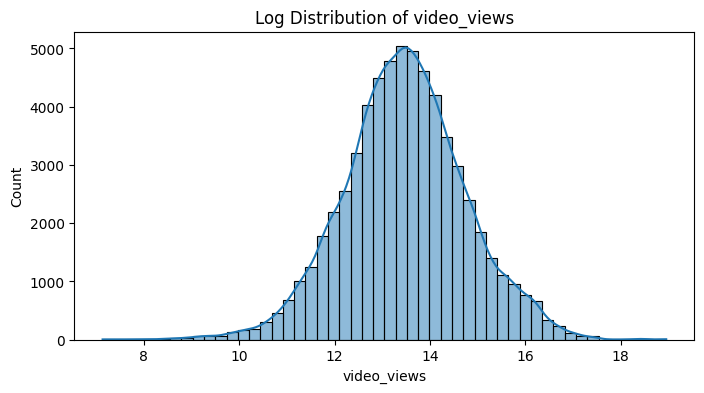

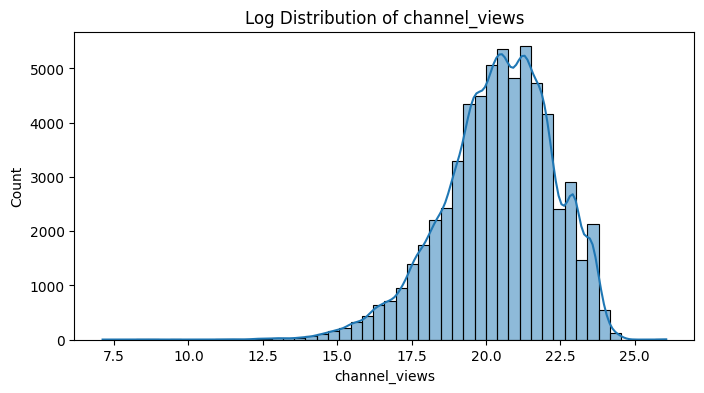

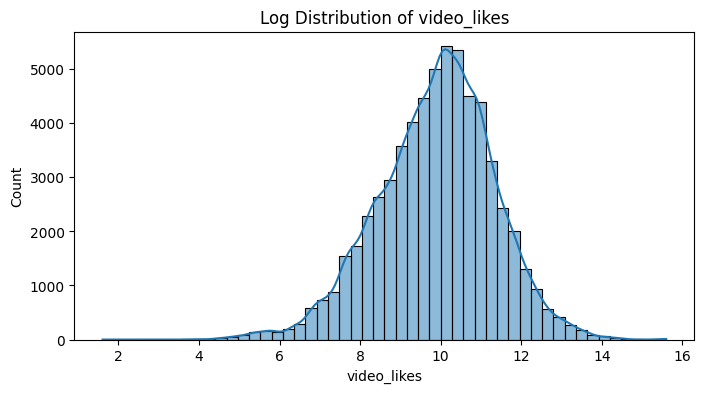

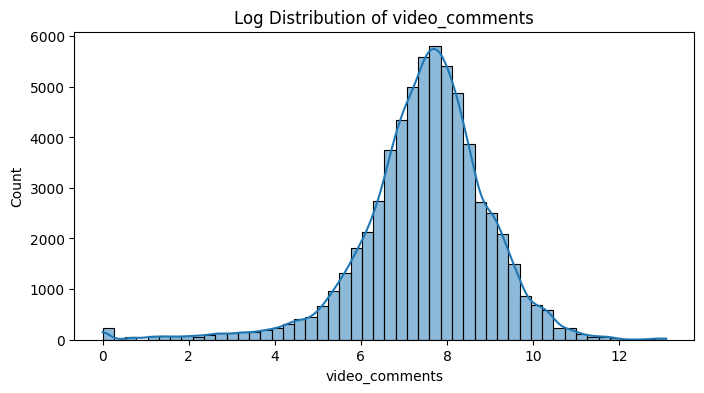

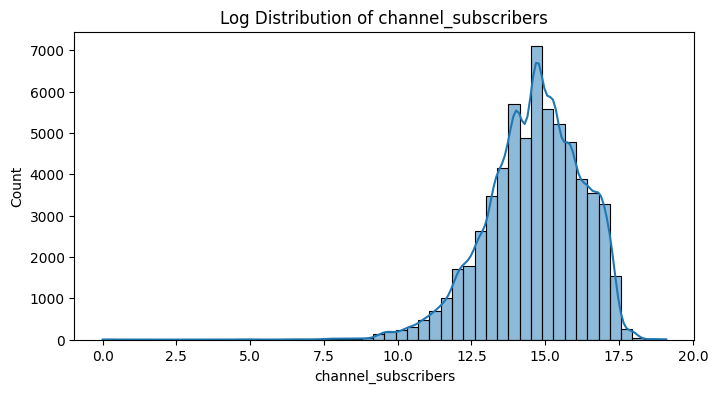

In [20]:
for col in ["video_views",  "channel_views", "video_likes", "video_comments", "channel_subscribers"]:
    plt.figure(figsize=(8,4))
    sns.histplot(np.log1p(df[col]), bins=50, kde=True)
    plt.title(f"Log Distribution of {col}")
    plt.show()

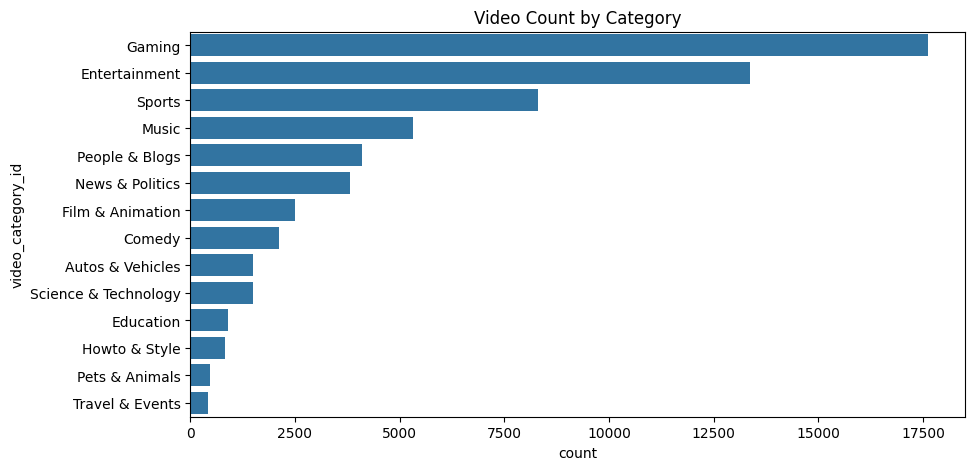

In [21]:
plt.figure(figsize=(10,5))
sns.countplot(y="video_category_id", data=df, order=df['video_category_id'].value_counts().index)
plt.title("Video Count by Category")
plt.show()

/tmp/ipython-input-2078214154.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_video_categories.values, y=top_video_categories.index, palette="Blues_r")


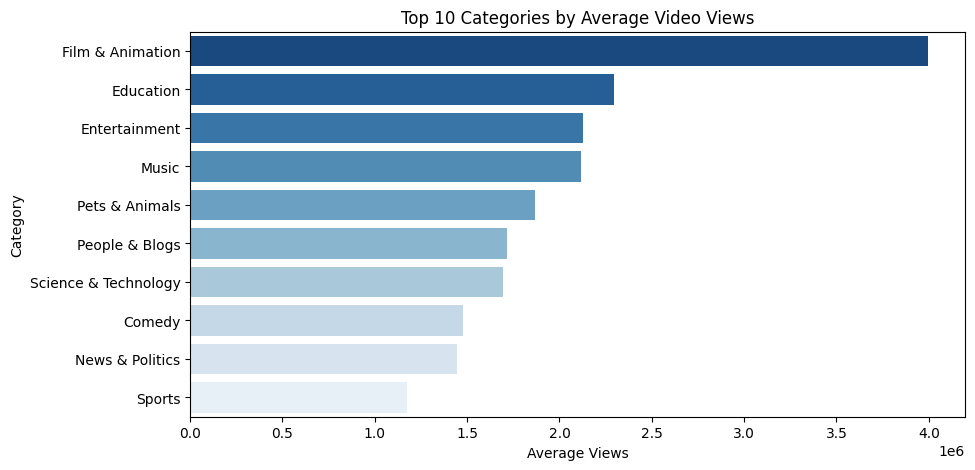

In [22]:
top_video_categories = df.groupby("video_category_id")['video_views'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_video_categories.values, y=top_video_categories.index, palette="Blues_r")
plt.title("Top 10 Categories by Average Video Views")
plt.xlabel("Average Views")
plt.ylabel("Category")
plt.show()

/tmp/ipython-input-2905401797.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_channel_categories.values, y=top_channel_categories.index, palette="Blues_r")


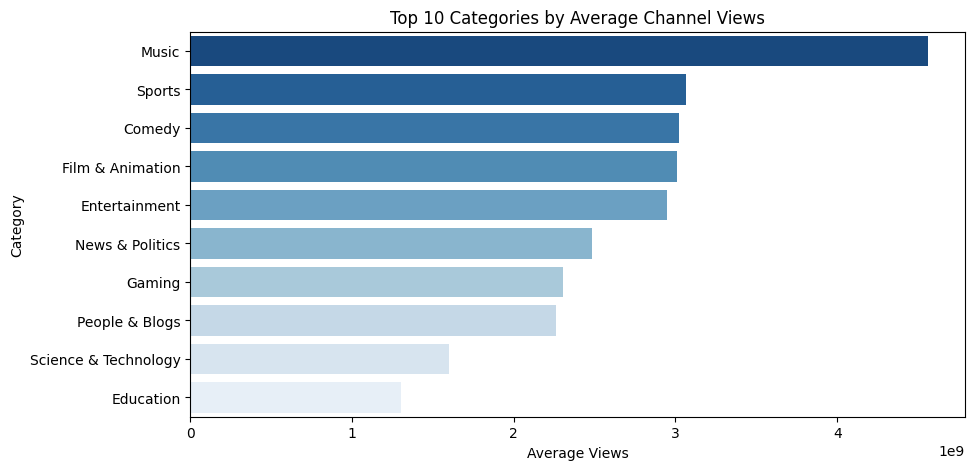

In [23]:
top_channel_categories = df.groupby("video_category_id")['channel_views'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_channel_categories.values, y=top_channel_categories.index, palette="Blues_r")
plt.title("Top 10 Categories by Average Channel Views")
plt.xlabel("Average Views")
plt.ylabel("Category")
plt.show()

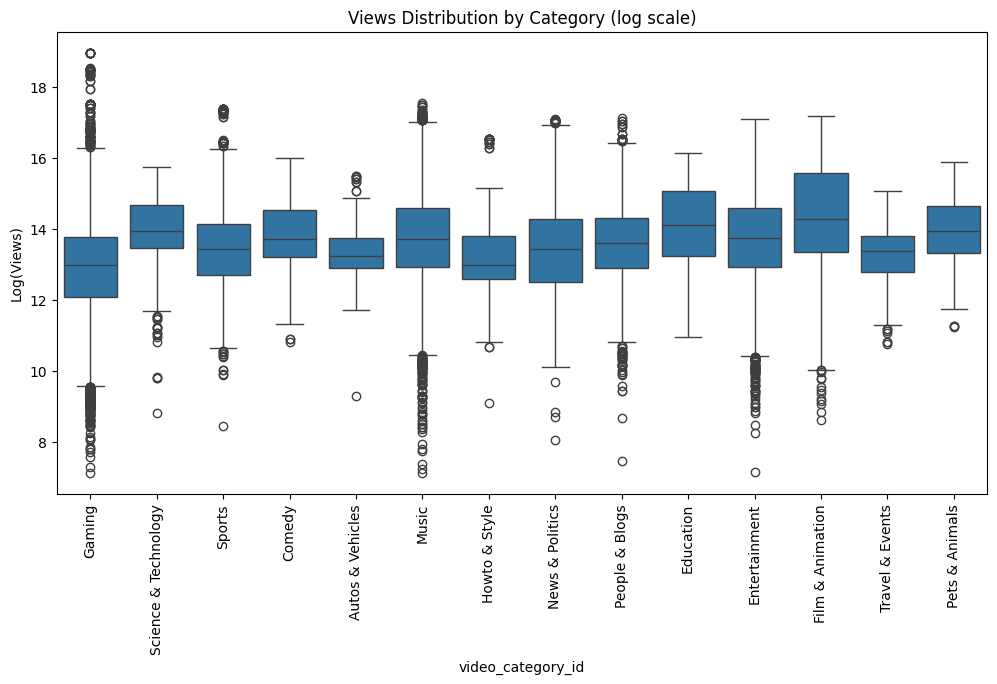

In [24]:
plt.figure(figsize=(12,6))
sns.boxplot(x="video_category_id", y=np.log1p(df["video_views"]), data=df)
plt.xticks(rotation=90)
plt.title("Views Distribution by Category (log scale)")
plt.ylabel("Log(Views)")
plt.show()

/tmp/ipython-input-2067655810.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="video_category_id", y=np.log1p(df["video_likes"]), data=df, palette="Set2")


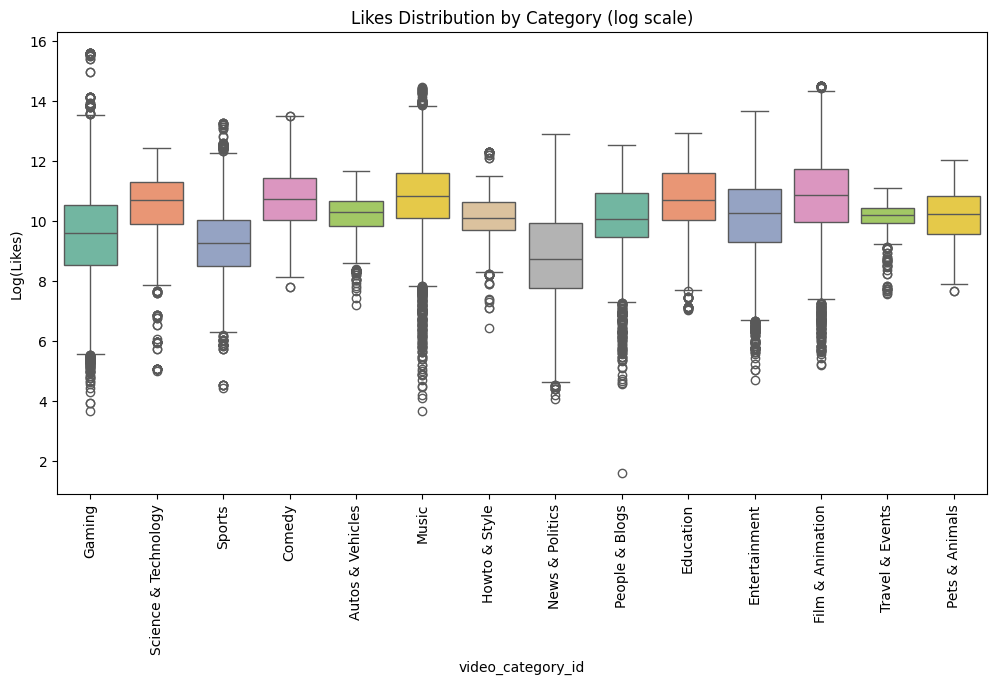

In [25]:
plt.figure(figsize=(12,6))
sns.boxplot(x="video_category_id", y=np.log1p(df["video_likes"]), data=df, palette="Set2")
plt.xticks(rotation=90)
plt.title("Likes Distribution by Category (log scale)")
plt.ylabel("Log(Likes)")
plt.show()

/tmp/ipython-input-3313994896.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="video_category_id", y=np.log1p(df["video_comments"]), data=df, palette="Set3")


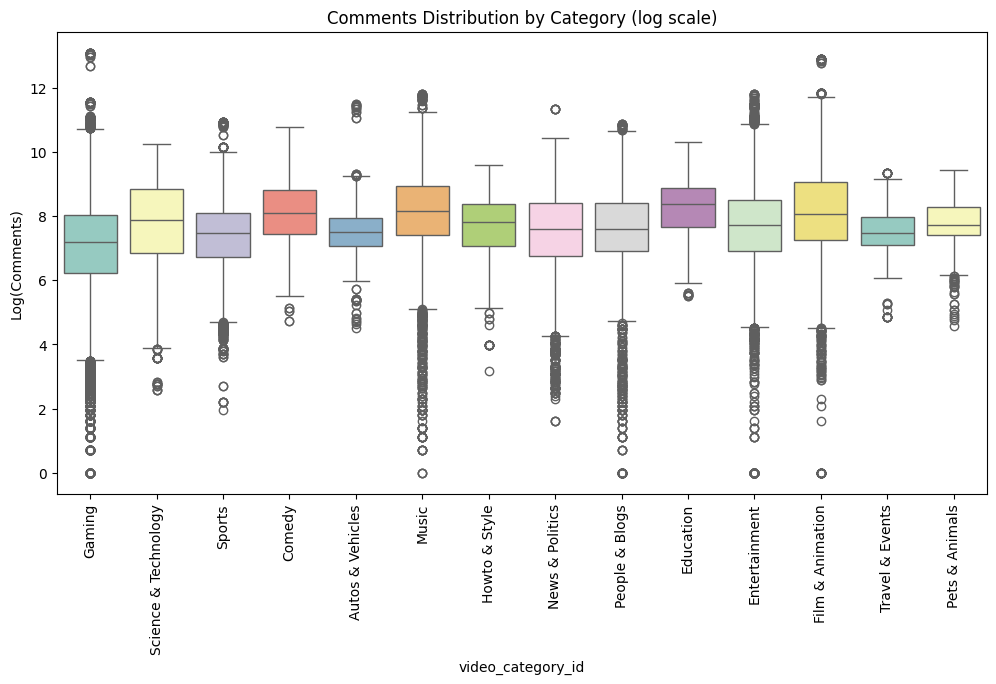

In [26]:
plt.figure(figsize=(12,6))
sns.boxplot(x="video_category_id", y=np.log1p(df["video_comments"]), data=df, palette="Set3")
plt.xticks(rotation=90)
plt.title("Comments Distribution by Category (log scale)")
plt.ylabel("Log(Comments)")
plt.show()

In [39]:
#Change video duration to an integer
df['video_duration_int'] = pd.to_numeric(df['video_duration'], errors='coerce').astype('Int64')
df['video_duration_float'] = pd.to_numeric(df['video_duration'], errors='coerce').astype('float')

In [28]:
# Create duration bins
df['duration_bin'] = pd.cut(df['video_duration_int'],
                            bins=[0,60,300,1200,3600,100000],
                            labels=['<1 min','1-5 min','5-20 min','20-60 min','>60 min'])

# Pivot table: median views by category & duration
pivot = df.groupby(['video_category_id','video_duration_int'])['video_views'].median().unstack()

plt.figure(figsize=(12,6))
sns.heatmap(np.log1p(pivot), cmap="Blues", annot=True, fmt=".0f")
plt.title("Median Views by Category & Duration Bin (log scale)")
plt.show()

ValueError: zero-size array to reduction operation fmin which has no identity

<Figure size 1200x600 with 0 Axes>

In [29]:
# Flatten hashtags by category
category_hashtags = (df.groupby('video_category_id')['clean_video_tags']
                       .apply(lambda x: list(itertools.chain.from_iterable(x.dropna()))))

# Count top hashtags per category
for cat in category_hashtags.index:
    top_tags = Counter(category_hashtags[cat]).most_common(5)
    print(f"Top hashtags in {cat}: {top_tags}")

#for cat in category_hashtags.index:
    #tag_count = Counter(category_hashtags)
#top_tags = tag_count.most_common(5)
#return top_tags
#print(f"Top hashtags in {cat}: {top_tags}")


Top hashtags in Autos & Vehicles: [(' ', 47498), ('e', 26499), ('r', 25080), ('a', 24954), ('o', 19015)]
Top hashtags in Comedy: [(' ', 68395), ('e', 39249), ('n', 33554), ('a', 32794), ('o', 32086)]
Top hashtags in Education: [(' ', 29624), ('e', 19943), ('a', 17747), ('i', 15761), ('r', 14377)]
Top hashtags in Entertainment: [(' ', 436685), ('e', 278316), ('a', 244707), ('i', 183435), ('r', 177326)]
Top hashtags in Film & Animation: [(' ', 75474), ('e', 49129), ('a', 46767), ('i', 42064), ('n', 40634)]
Top hashtags in Gaming: [(' ', 586905), ('e', 357994), ('a', 301864), ('o', 255254), ('r', 250370)]
Top hashtags in Howto & Style: [(' ', 28777), ('e', 18817), ('a', 15270), ('i', 14830), ('r', 12405)]
Top hashtags in Music: [(' ', 178522), ('e', 94022), ('a', 86559), ('o', 78678), ('n', 73205)]
Top hashtags in News & Politics: [(' ', 77222), ('e', 53086), ('a', 44114), ('r', 36683), ('n', 36054)]
Top hashtags in People & Blogs: [(' ', 142770), ('e', 85096), ('a', 82515), ('r', 63493),

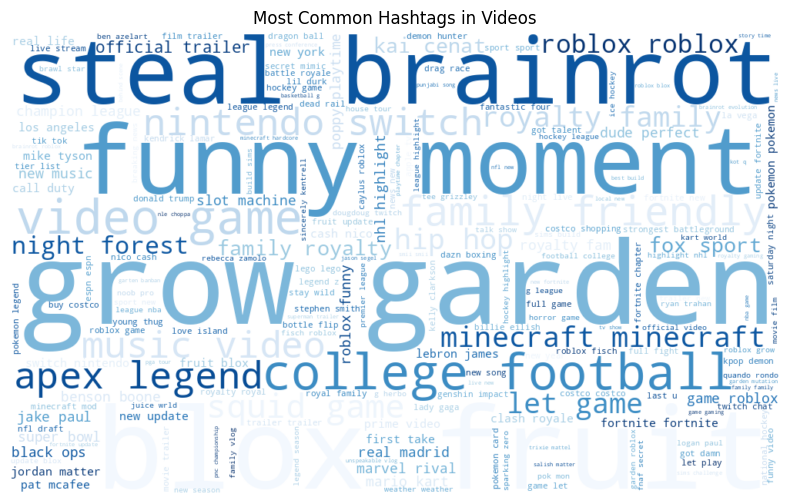

In [30]:
from wordcloud import WordCloud

hashtags_text = " ".join(str(tag) for tag in df['clean_video_tags'].dropna())

wordcloud_common = WordCloud(width=1000, height=600, background_color="white", colormap="Blues").generate(hashtags_text)

plt.figure(figsize=(12,6))
plt.imshow(wordcloud_common, interpolation="bilinear")
plt.axis("off")
plt.title("Most Common Hashtags in Videos")
plt.show()

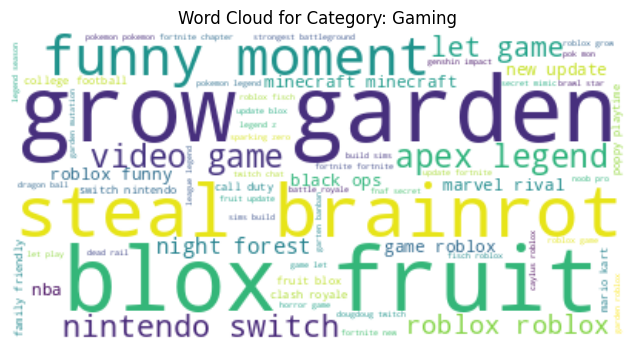

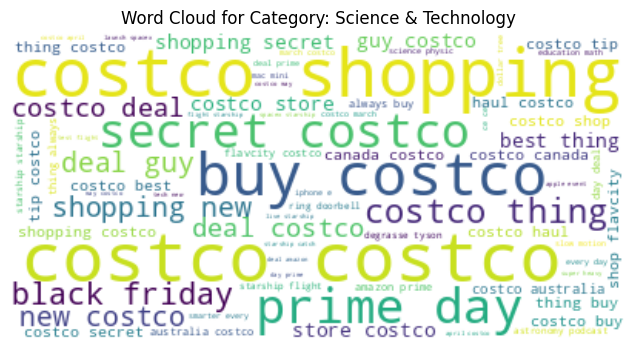

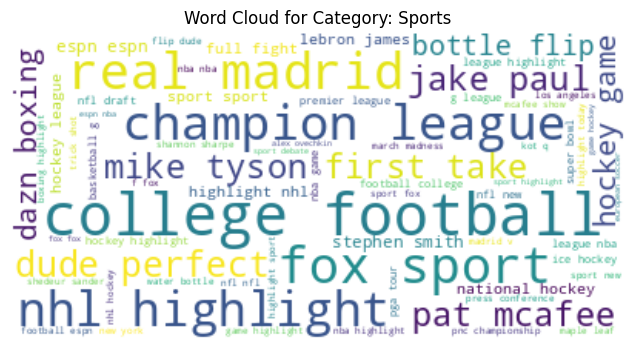

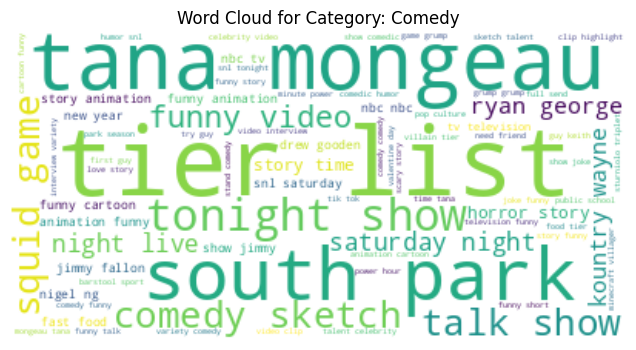

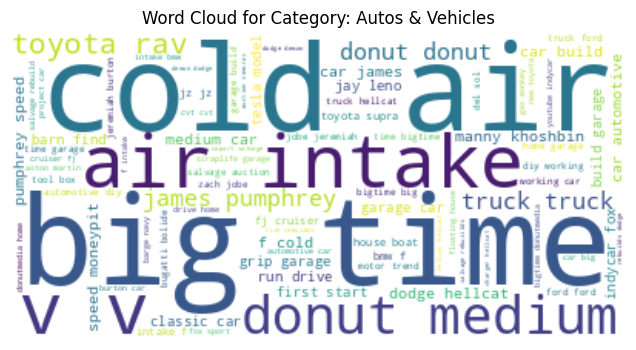

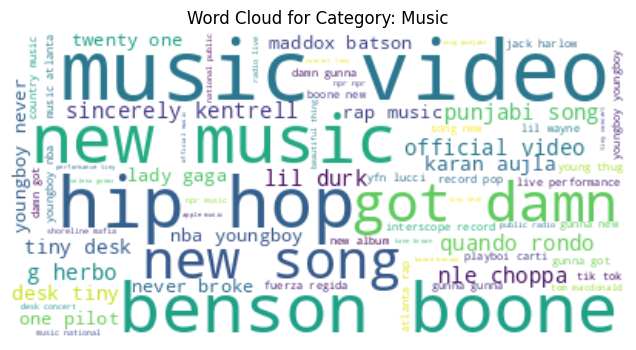

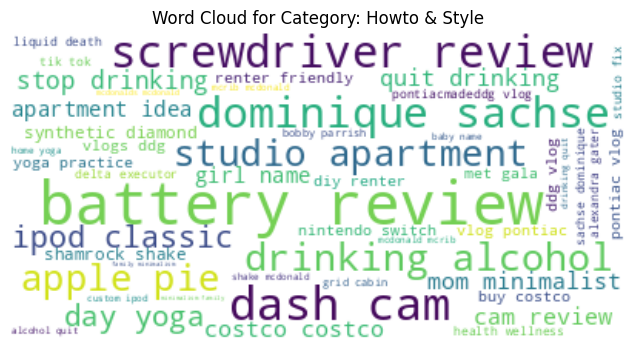

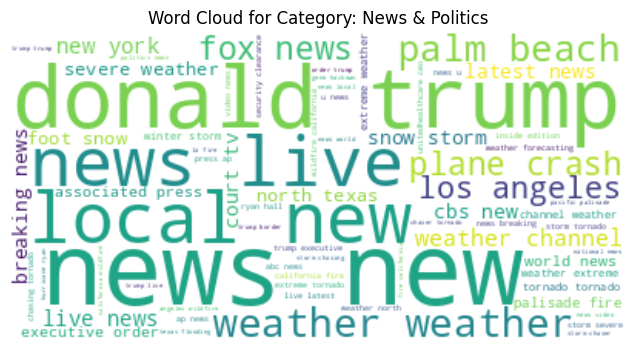

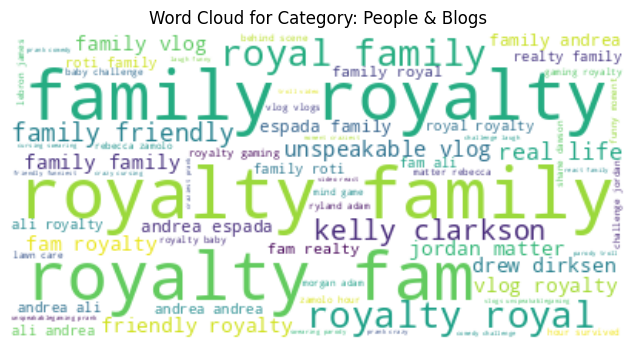

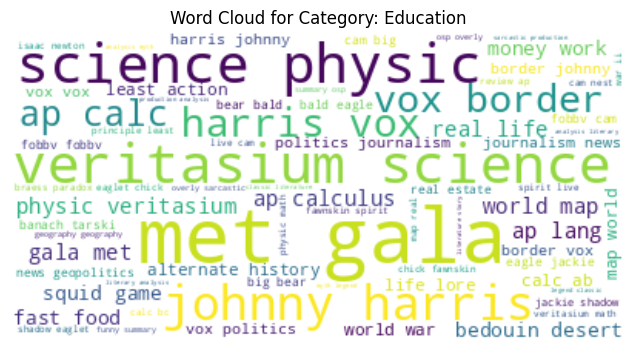

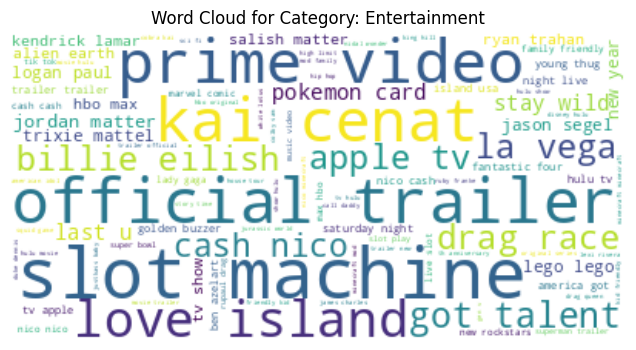

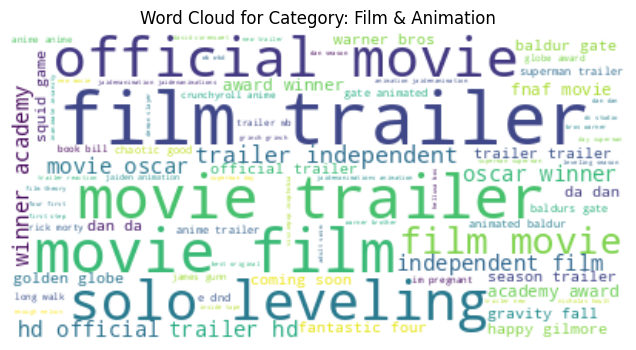

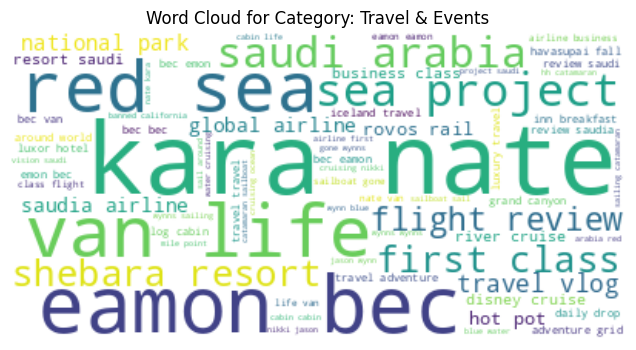

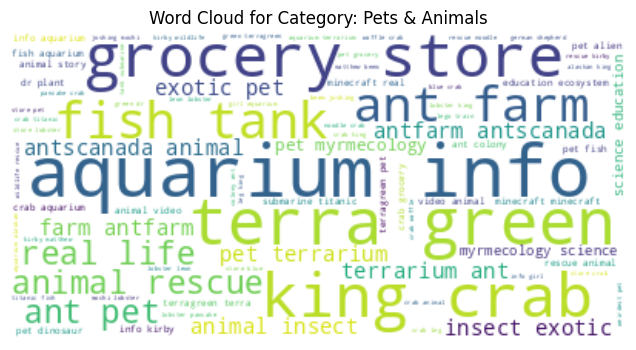

In [31]:
#wordcloud of hashtags for each particular category in the df dataset
for label in df['video_category_id'].unique():
  category_text = ' '.join(df[df['video_category_id'] == label]['clean_video_tags'])
  wordcloud2= WordCloud (width = 400, height = 200, background_color = 'white').generate(category_text)

  plt.figure(figsize = (10,4))
  plt.imshow(wordcloud2, interpolation = 'bilinear')
  plt.axis('off')
  plt.title(f'Word Cloud for Category: {label}')
  plt.show()

/tmp/ipython-input-1802624862.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_channels.values, y=top_channels.index, palette="Blues_r")


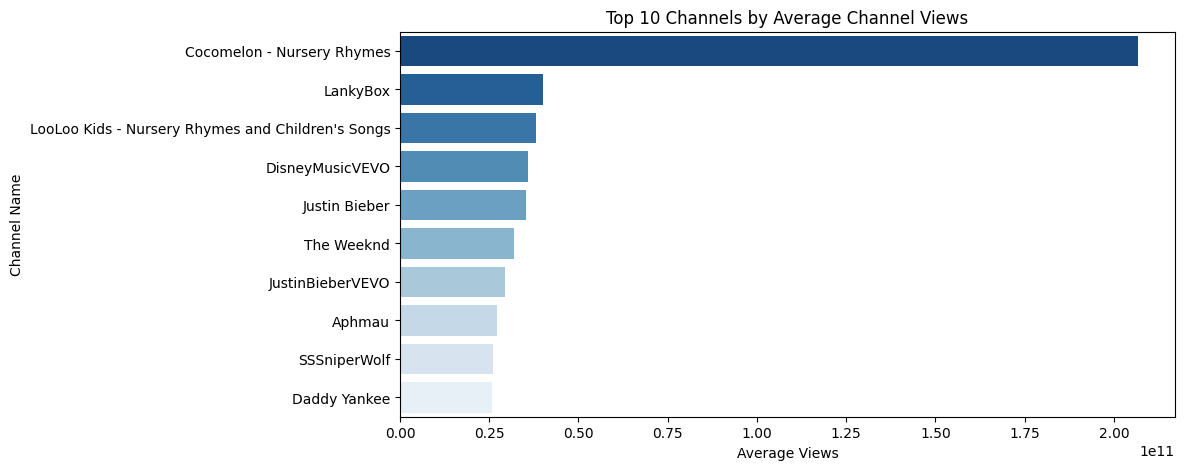

In [32]:
#Top Channels and category
top_channels = df.groupby("channel_title")['channel_views'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_channels.values, y=top_channels.index, palette="Blues_r")
plt.title("Top 10 Channels by Average Channel Views")
plt.xlabel("Average Views")
plt.ylabel("Channel Name")
plt.show()

In [42]:
df['video_dimension_int'] = pd.to_numeric(df['video_dimension'], errors='coerce').astype('float')

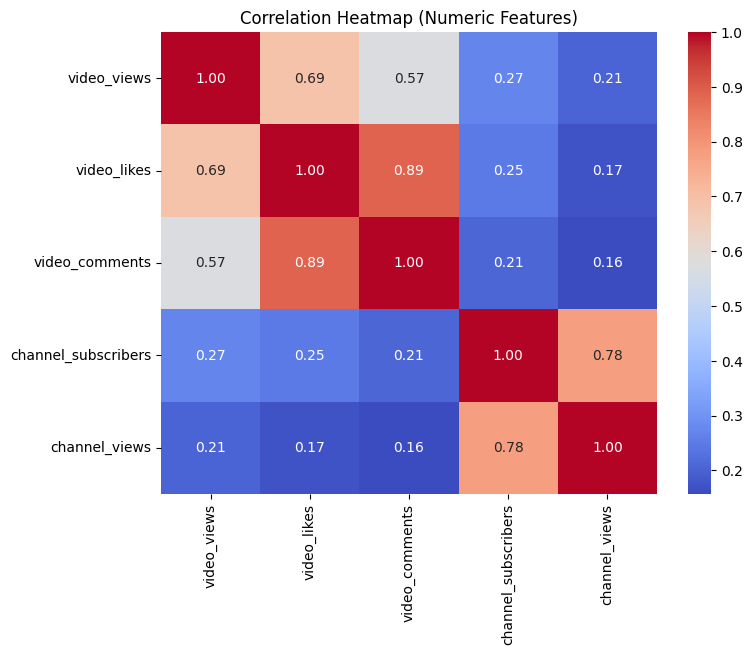

In [44]:
plt.figure(figsize=(8,6))
sns.heatmap(df[['video_views','video_likes','video_comments', 'channel_subscribers', 'channel_views']].corr(),
            annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()

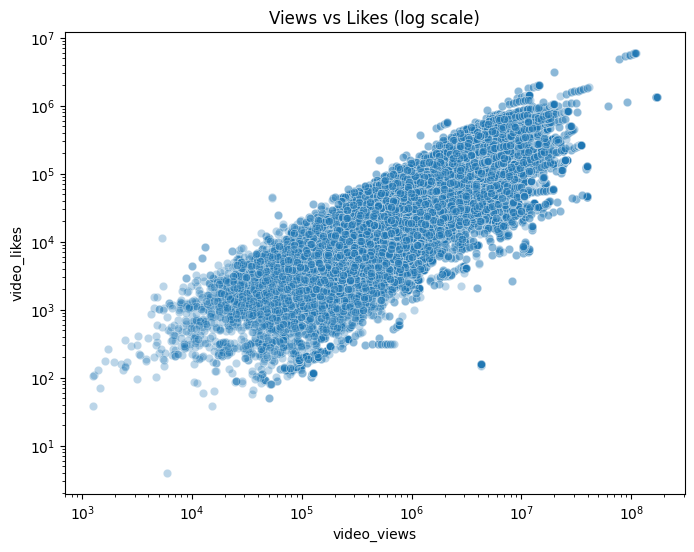

In [46]:
#Views vs Likes (log scale scatter)

plt.figure(figsize=(8,6))
sns.scatterplot(x="video_views", y="video_likes", data=df, alpha=0.3)
plt.xscale("log"); plt.yscale("log")
plt.title("Views vs Likes (log scale)")
plt.show()